### Treating Outliers
An outlier is a data point in a data set that is distant from all other observation.


### What is an Extreme Value?
An Extreme value is just a minimum or a maximum, it need not be much different from of the data.

### How can we Identify an outlier?
1-Using Box plots
2-Using Scatter plot
3-Using Z score

### There are Two Methods for Outlier Treatment
1. Interquartile Range(IQR) Method
2. Z Score method
IQR Method

### IQR Method
Data point that falls outside of 1.5 times of an Interquartile range above the 3rd quartile (Q3) and below the
1st quartile (Q1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./fifa_eda.csv')
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


In [3]:
df.shape

(18207, 18)

In [4]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

###### No null values in the column height

In [5]:
df.dropna(inplace=True)

### Lets consider the height column

### Plotting the box plot for checking outliers


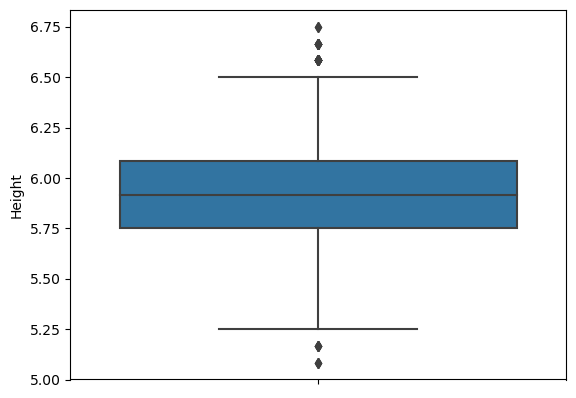

In [6]:
sns.boxplot(data=df, y = 'Height');

### Setting the outlier limits


In [7]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [8]:
UL,LL = outlier_limit(df['Height'])
df['Height'] = np.where((df['Height']>UL) | (df['Height']<LL),np.nan,df['Height'])

### Checking NaN values

In [9]:
df.isnull().sum()

ID                           0
Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Club                         0
Value                        0
Wage                         0
Preferred Foot               0
International Reputation     0
Skill Moves                  0
Position                     0
Joined                       0
Contract Valid Until         0
Height                      41
Weight                       0
Release Clause               0
dtype: int64

###### 41 outliers are removed from this data

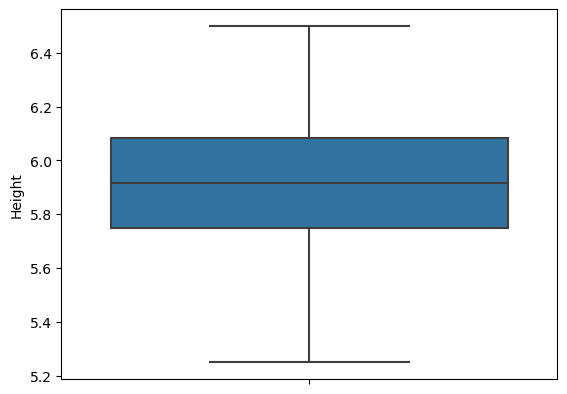

In [10]:
sns.boxplot(data=df, y = 'Height');

In [11]:
df.dropna(inplace=True)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [12]:
df.shape

(17866, 18)

### Z Score Method
Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of
2 standard deviation.


In [13]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [14]:
data = sns.load_dataset('healthexp')
data

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


In [15]:
data.isnull().sum()

Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64

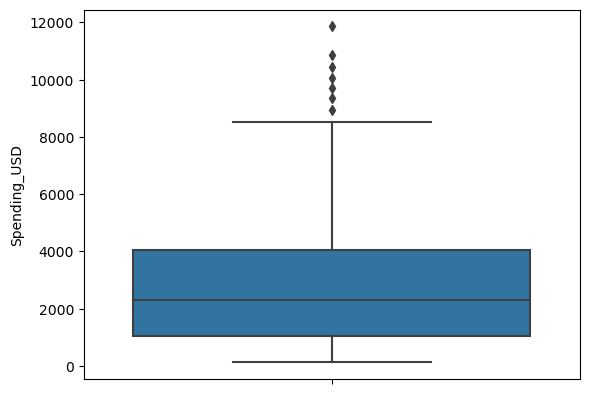

In [16]:
sns.boxplot(data=data,y='Spending_USD');

In [17]:
def outlier_limit(col):
    Q1,Q3 = np.nanpercentile(col,[25,75])
    IQR = Q3 - Q1
    UL = Q3 +1.5*IQR
    LL = Q1-1.5*IQR
    return LL,UL

In [22]:
LL,UL = outlier_limit(data['Spending_USD'])
data['Spending_USD'] = np.where((data['Spending_USD']>UL)|(data['Spending_USD']<LL),np.nan,data['Spending_USD'])

###### this time we used the above equation two times to drop all the ouliers
first this showed 7 ouliers. now,it is 9

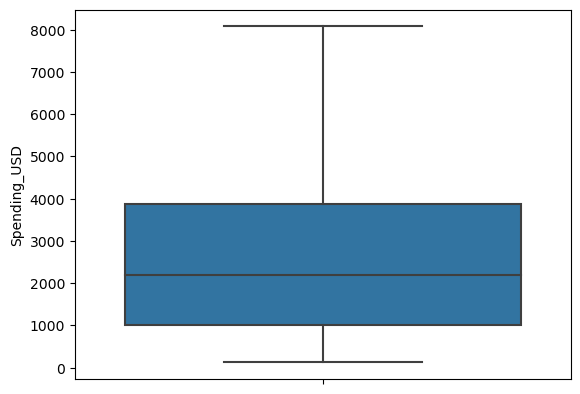

In [23]:
sns.boxplot(data=data,y='Spending_USD');

In [24]:
data.isnull().sum()

Year               0
Country            0
Spending_USD       2
Life_Expectancy    0
dtype: int64

In [25]:
data.dropna(inplace=True)